# We will build a model that takes an image as input and determines whether the image contains a picture of a dog or a cat.

![](https://lirp.cdn-website.com/f499246c/dms3rep/multi/opt/Convolutional+Neural+Network-637w.jpg)

image credits: [Click Here](https://lirp.cdn-website.com/f499246c/dms3rep/multi/opt/Convolutional+Neural+Network-637w.jpg)

# About Dataset:
- ### The Asirra (animal species image recognition for restricting access) dataset was introduced in 2013 for a machine learning competition. The dataset includes 25,000 images with equal numbers of labels for cats and dogs.

# Cats vs Dogs Classification using CNN Tensorflow.Keras 
- A convolutional neural network (CNN) is a type of artificial neural network used in image recognition and processing that is specifically designed to process pixel data. A CNN uses a system much like a multilayer perceptron that has been designed for reduced processing requirements

- image credits: [Click Here](https://media.geeksforgeeks.org/wp-content/uploads/cat-vs-dog.jpp)

![](https://media.geeksforgeeks.org/wp-content/uploads/cat-vs-dog.jpg)

In [1]:
# Import the libraries
import os
import torch
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [2]:
# checking if gpu is available 
import tensorflow as tf
tf.test.is_gpu_available()

2022-01-11 10:52:14.560645: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-11 10:52:14.623088: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-11 10:52:14.624572: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-11 10:52:14.625702: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

True

In [3]:
def get_default_device():
    """Picking GPU if available or else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [4]:
device = get_default_device()

In [5]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

- Prepare dataset for training model:

In [6]:
data_set = "dogs-vs-cats"

import zipfile 
with zipfile.ZipFile("/kaggle/input/"+ data_set +"/train.zip","r") as z:
    z.extractall(".")
    # save all files to kaggle/files/images
    destination = '/kaggle/files/images/train'
    z.extractall(destination)
    
with zipfile.ZipFile("/kaggle/input/"+ data_set +"/test1.zip","r") as z:
    z.extractall(".")
    # save all files to kaggle/files/images
    destination = '/kaggle/files/images/test'
    z.extractall(destination)

In [7]:
def list_full_paths(directory):
    return [os.path.join(directory, file) for file in os.listdir(directory)]

train = pd.DataFrame({'filepath': list_full_paths('/kaggle/files/images/train/train')})
train['truth_label'] = np.where(train['filepath'].str.contains('dog'), 'dog', 'cat')

test = pd.DataFrame({'filepath': list_full_paths('/kaggle/files/images/test/test1')})

In [8]:
from sklearn.model_selection import train_test_split


X_train, X_test = train_test_split(train, test_size=0.2)

In [9]:
train.shape

(25000, 2)

In [10]:
test.shape

(12500, 1)

In [11]:
train.columns

Index(['filepath', 'truth_label'], dtype='object')

In [12]:
test.columns

Index(['filepath'], dtype='object')

In [13]:
train.head()

filepath truth_label
0   /kaggle/files/images/train/train/dog.890.jpg         dog
1  /kaggle/files/images/train/train/dog.1178.jpg         dog
2  /kaggle/files/images/train/train/dog.7845.jpg         dog
3  /kaggle/files/images/train/train/dog.4632.jpg         dog
4  /kaggle/files/images/train/train/cat.3660.jpg         cat

In [14]:
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
training_set = train_datagen.flow_from_dataframe(dataframe=X_train, x_col='filepath', y_col='truth_label', class_mode='categorical', target_size = (64, 64), batch_size = 128)
test_set = test_datagen.flow_from_dataframe(dataframe=X_test, x_col='filepath', y_col='truth_label', class_mode='categorical', target_size = (64, 64), batch_size = 128)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


- plotting images from dataset

Found 37500 images belonging to 2 classes.
Found 37500 images belonging to 2 classes.


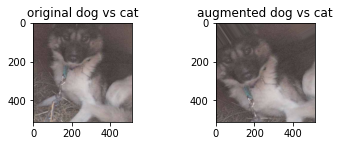

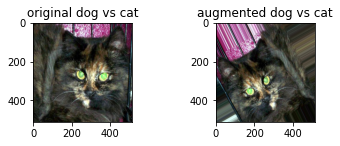

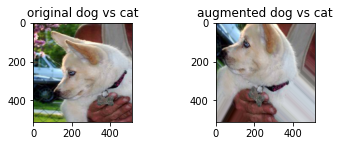

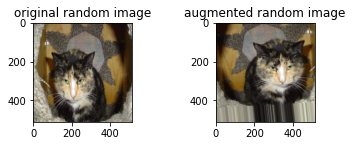

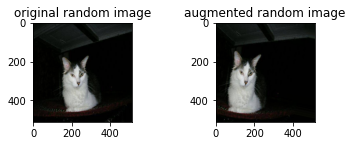

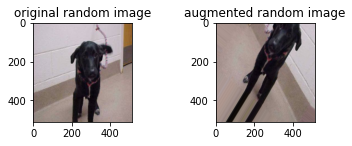

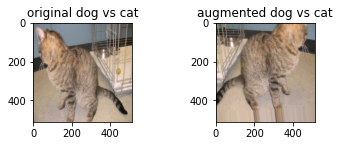

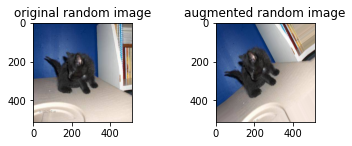

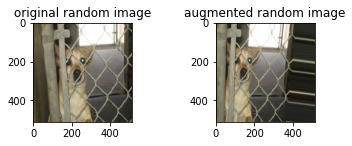

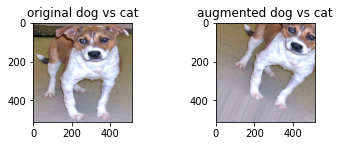

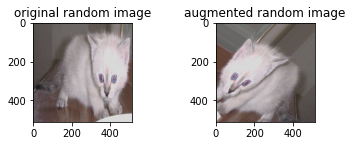

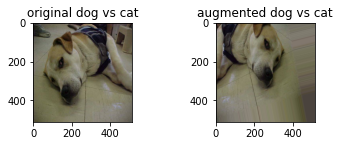

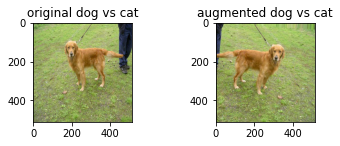

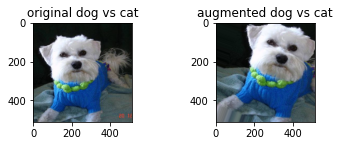

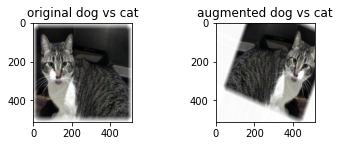

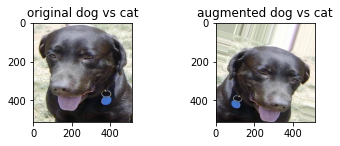

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline


batches_augmented = train_datagen.flow_from_directory('/kaggle/files/images/', target_size = (512, 512), batch_size = 16, class_mode = 'categorical', seed=1234)
batches_real = test_datagen.flow_from_directory('/kaggle/files/images/', target_size = (512, 512), batch_size = 16, class_mode = 'categorical', seed=1234)

x_batch_augmented, y_batch_augmented = next(batches_augmented)
x_batch_real, y_batch_real = next(batches_real)

for i in range(16):
    image_augmented = x_batch_augmented[i]
    image_real = x_batch_real[i]
    
    title_add_on = "random image"
    if y_batch_augmented[i][1]: title_add_on =  "dog vs cat"

    plt.subplot(221)
    plt.imshow(image_real)
    plt.title("original " + title_add_on)

        
    plt.subplot(222)
    plt.imshow(image_augmented)
    plt.title("augmented " + title_add_on)

    plt.show()

- Create the neural net model:

In [17]:
classifier = Sequential()

classifier.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",
                padding="valid", input_shape = (64,64,3)))

classifier.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))

classifier.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",
                padding="valid", input_shape = (64,64,3)))

classifier.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))

classifier.add(Flatten())
classifier.add(Dense(128,activation="relu")) 
classifier.add(Dense(2,activation="sigmoid")) 

2022-01-11 10:53:11.839109: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-11 10:53:11.840218: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-11 10:53:11.841106: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-11 10:53:11.842291: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-11 10:53:11.843380: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [18]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2

In [19]:
classifier.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

- Model Training 

In [20]:
history = classifier.fit(training_set, validation_data = test_set, epochs=20)

2022-01-11 10:53:13.769412: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-01-11 10:53:16.419076: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


157/157 [==============================] - 104s 605ms/step - loss: 0.6704 - accuracy: 0.5801 - val_loss: 0.6333 - val_accuracy: 0.6390
Epoch 2/20
157/157 [==============================] - 95s 602ms/step - loss: 0.6238 - accuracy: 0.6496 - val_loss: 0.7042 - val_accuracy: 0.6022
Epoch 3/20
157/157 [==============================] - 95s 605ms/step - loss: 0.6013 - accuracy: 0.6747 - val_loss: 0.6047 - val_accuracy: 0.6896
Epoch 4/20
157/157 [==============================] - 97s 616ms/step - loss: 0.5865 - accuracy: 0.6852 - val_loss: 0.5369 - val_accuracy: 0.7274
Epoch 5/20
157/157 [==============================] - 97s 619ms/step - loss: 0.5678 - accuracy: 0.7016 - val_loss: 0.5626 - val_accuracy: 0.7154
Epoch 6/20
157/157 [==============================] - 97s 618ms/step - loss: 0.5517 - accuracy: 0.7140 - val_loss: 0.5453 - val_accuracy: 0.7304
Epoch 7/20
157/157 [==============================] - 97s 620ms/step - loss: 0.5443 - accuracy: 0.7190 - val_loss: 0.4990 - val_accuracy: 0.

In [21]:
test_set2 = test_datagen.flow_from_dataframe(dataframe=test,
    directory = '/kaggle/files/images/test',
    x_col = 'filepath',
    y_col = None,
    class_mode = None,
    target_size = (64, 64),
    batch_size = 32,
    shuffle = False)

Found 12500 validated image filenames.


In [22]:
test_preds = classifier.predict(test_set2, steps = np.ceil(test.shape[0] / 32))

test["test_preds"] = np.argmax(test_preds, axis = 1)
labels = dict((v,k) for k,v in training_set.class_indices.items())

test['test_preds'] = test['test_preds'].map(labels)

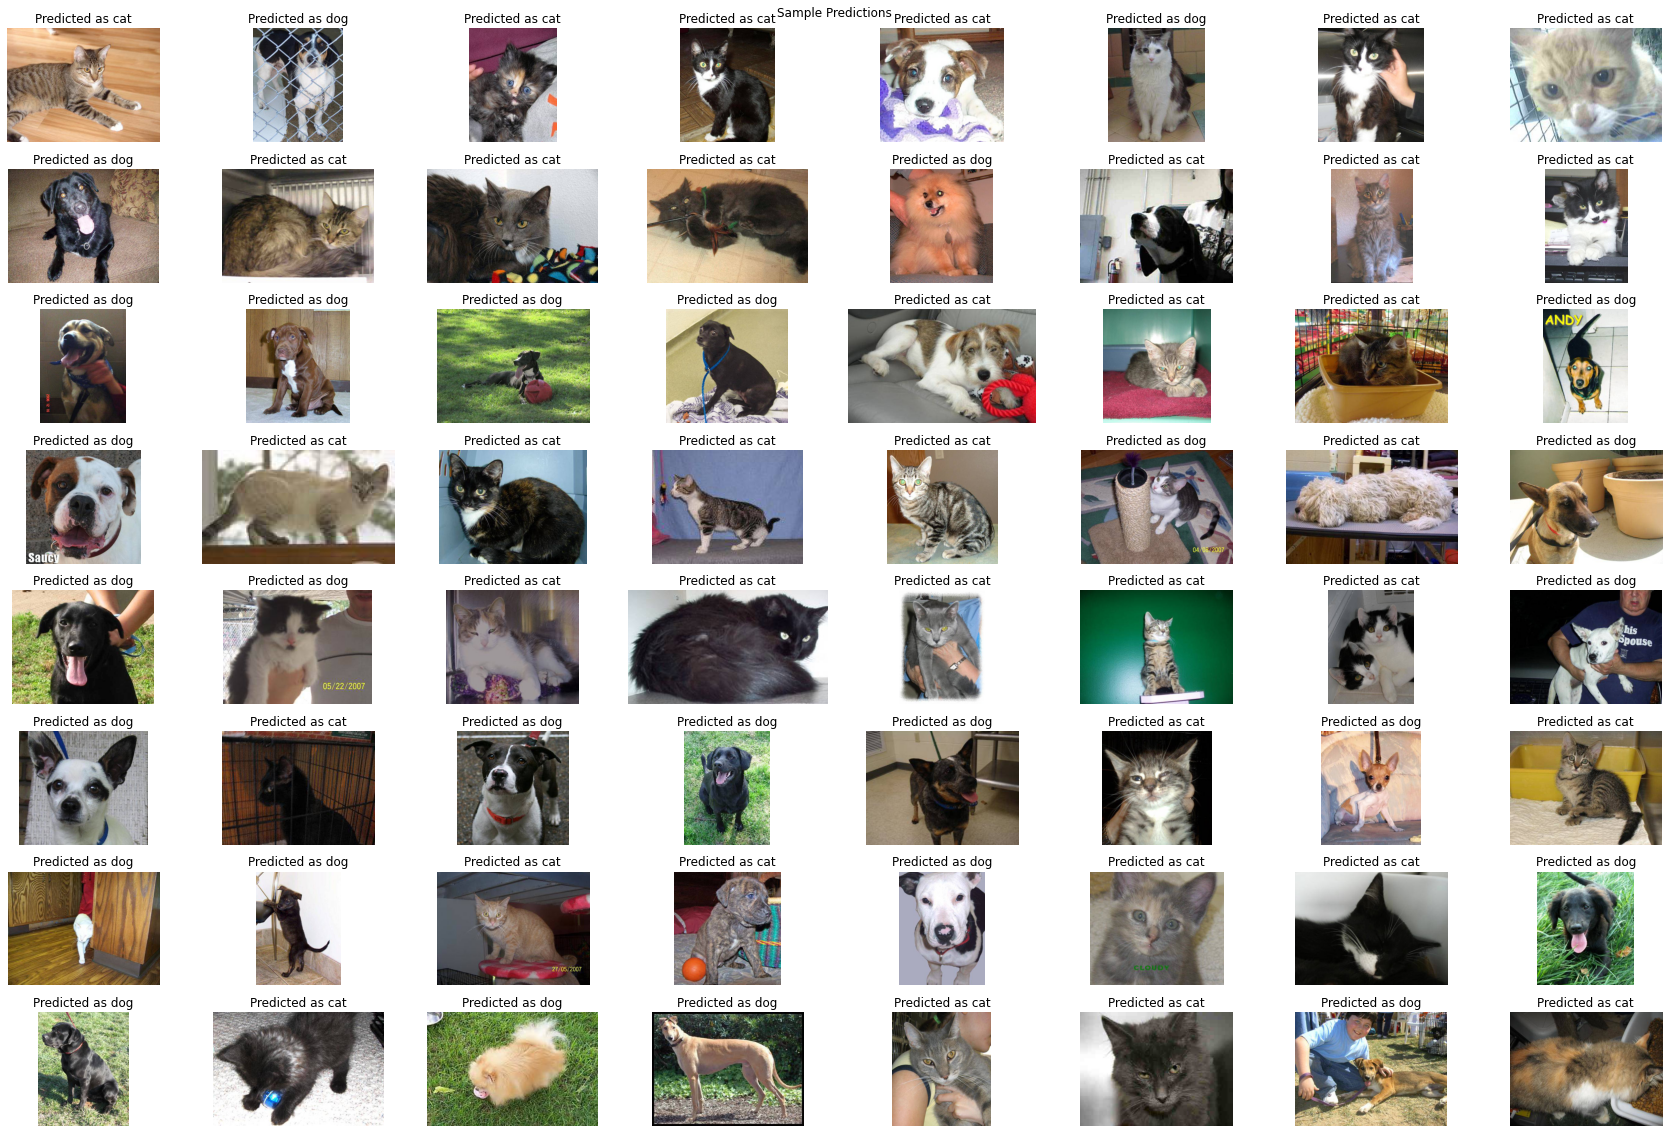

In [23]:
sample_test = test.sample(64).reset_index(drop = True)

fig = plt.figure(1, figsize = (24, 20))
fig.suptitle("Sample Predictions")

for i in range(len(sample_test)):
    
    plt.subplot(10, 8, i + 1)
    image = load_img(sample_test.filepath[i])
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Predicted as {sample_test['test_preds'][i]}")
    
plt.tight_layout()
plt.show()

# Now will be using VGG16

- VGG-16 is a convolutional neural network that is 16 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database [1]. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. 

- image credits: [Click Here](https://media.geeksforgeeks.org/wp-content/uploads/20200219152327/conv-layers-vgg16.jpg)

![](https://media.geeksforgeeks.org/wp-content/uploads/20200219152327/conv-layers-vgg16.jpg)

In [24]:
!rm -r ./*

In [25]:
!unzip ../input/dogs-vs-cats/train.zip -d ./new_data

Archive:  ../input/dogs-vs-cats/train.zip
   creating: ./new_data/train/
  inflating: ./new_data/train/cat.0.jpg  
  inflating: ./new_data/train/cat.1.jpg  
  inflating: ./new_data/train/cat.10.jpg  
  inflating: ./new_data/train/cat.100.jpg  
  inflating: ./new_data/train/cat.1000.jpg  
  inflating: ./new_data/train/cat.10000.jpg  
  inflating: ./new_data/train/cat.10001.jpg  
  inflating: ./new_data/train/cat.10002.jpg  
  inflating: ./new_data/train/cat.10003.jpg  
  inflating: ./new_data/train/cat.10004.jpg  
  inflating: ./new_data/train/cat.10005.jpg  
  inflating: ./new_data/train/cat.10006.jpg  
  inflating: ./new_data/train/cat.10007.jpg  
  inflating: ./new_data/train/cat.10008.jpg  
  inflating: ./new_data/train/cat.10009.jpg  
  inflating: ./new_data/train/cat.1001.jpg  
  inflating: ./new_data/train/cat.10010.jpg  
  inflating: ./new_data/train/cat.10011.jpg  
  inflating: ./new_data/train/cat.10012.jpg  
  inflating: ./new_data/train/cat.10013.jpg  
  inflating: ./new_dat

In [26]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = './new_data/train'

In [27]:
# The directory where we will
# store our smaller dataset
base_dir = './new_data_base'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [28]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [29]:
import shutil
# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [30]:
# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [31]:
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [32]:
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [33]:
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [34]:
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [35]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [36]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [37]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(150, 150, 3))

conv_base.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [39]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    
    i = 0
    
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop, 
            # we must `break` after every image has been seen once.
            break
    return features, labels


In [40]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_feature, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [41]:
# flattening our input data for dense layers
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_feature = np.reshape(test_feature, (1000, 4 * 4 * 512))

In [42]:
model = models.Sequential()
model.add(layers.Dense(256, activation="relu", input_dim = 4 * 4 * 512))

# adding Dropout layer for regularization
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [43]:
from tensorflow.keras import optimizers

model.compile(
    loss="binary_crossentropy", 
    optimizer=optimizers.RMSprop(lr=2e-5), 
    metrics=["acc"])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [44]:
history = model.fit(
    train_features, train_labels, 
    epochs=30, 
    batch_size=20,
    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 7ms/step - loss: 0.5830 - acc: 0.6875 - val_loss: 0.4380 - val_acc: 0.8410
Epoch 2/30
100/100 [==============================] - 0s 5ms/step - loss: 0.4246 - acc: 0.8065 - val_loss: 0.3559 - val_acc: 0.8700
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3578 - acc: 0.8405 - val_loss: 0.3218 - val_acc: 0.8820
Epoch 4/30
100/100 [==============================] - 0s 5ms/step - loss: 0.3110 - acc: 0.8720 - val_loss: 0.2914 - val_acc: 0.8930
Epoch 5/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2840 - acc: 0.8865 - val_loss: 0.2778 - val_acc: 0.8950
Epoch 6/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2715 - acc: 0.8895 - val_loss: 0.2694 - val_acc: 0.8960
Epoch 7/30
100/100 [==============================] - 0s 5ms/step - loss: 0.2516 - acc: 0.9000 - val_loss: 0.2629 - val_acc: 0.8970
Epoch 8/30
100/100 [==============================] - 0s 5ms/step - loss: 0.

In [45]:
model.save("./cats_and_dogs_vgg16.h5")

In [46]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

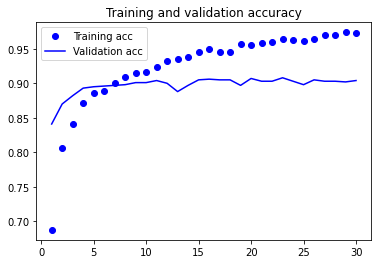

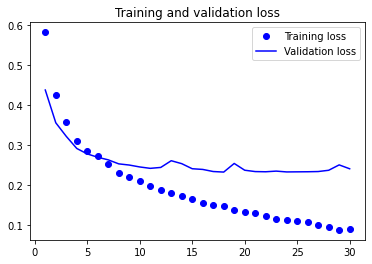

In [47]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Conclusion:
- **Both performed Quite well.**